Saving Mall_Customers.csv to Mall_Customers (2).csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usag

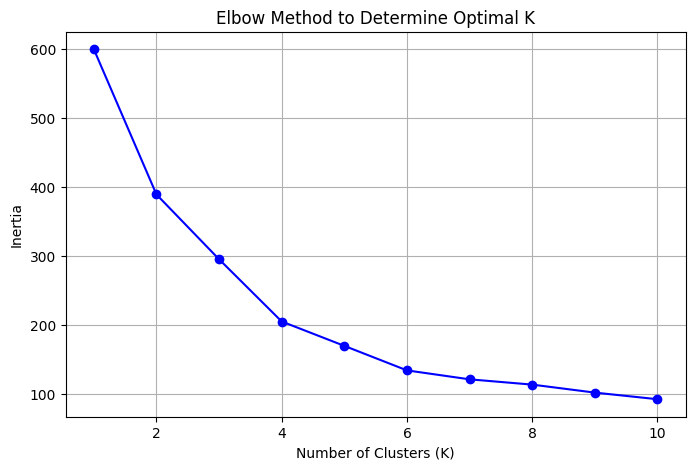

Silhouette Score for K=5: 0.4085


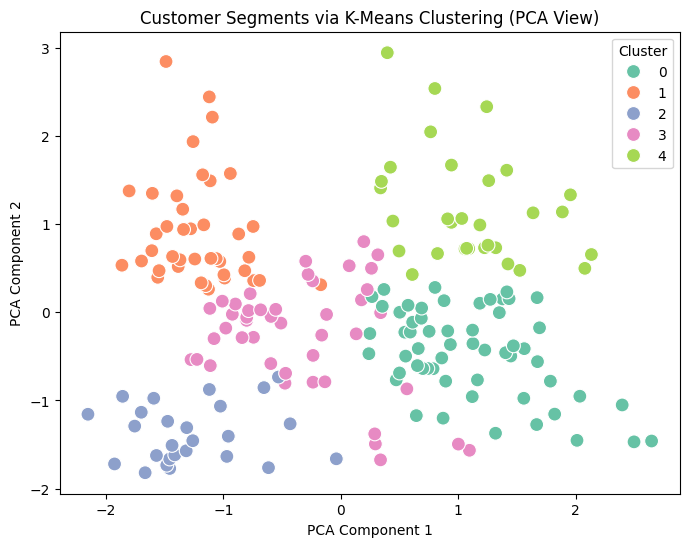

In [5]:
# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# STEP 2: Upload File (Run this in Colab first)
from google.colab import files
uploaded = files.upload()

# STEP 3: Load Dataset
df = pd.read_csv("/content/Mall_Customers.csv")

# STEP 4: Basic Exploration
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# STEP 5: Select Numeric Features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# STEP 6: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 7: Elbow Method for Optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.grid(True)
plt.show()

# STEP 8: Apply KMeans (Assume Optimal K = 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# STEP 9: Evaluate with Silhouette Score
score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score for K={optimal_k}: {score:.4f}')

# STEP 10: PCA for 2D Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

# STEP 11: Visualize Clusters in 2D
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments via K-Means Clustering (PCA View)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
